# Setup


In [1]:
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

%load_ext autoreload
%autoreload 2

plt.style.use('ggplot')


# Example: NumPy Correlation Calculation


In [2]:
x = np.arange(10, 20)
print(x)

y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
print(y)

# x = np.array([1,2,3])
# y = np.array([10,21,32])
r = np.corrcoef(x, y)
r

[10 11 12 13 14 15 16 17 18 19]
[ 2  1  4  5  8 12 18 25 96 48]


array([[1.        , 0.75864029],
       [0.75864029, 1.        ]])

# Example: SciPy Correlation Calculation

In [3]:
import scipy

print(scipy.stats.pearsonr(x, y))
print(scipy.stats.spearmanr(x, y))
print(scipy.stats.kendalltau(x, y))


PearsonRResult(statistic=0.7586402890911869, pvalue=0.010964341301680832)
SpearmanrResult(correlation=0.9757575757575757, pvalue=1.4675461874042197e-06)
KendalltauResult(correlation=0.911111111111111, pvalue=2.9761904761904762e-05)


# Example: Pandas Correlation Calculation


In [4]:
x = pd.Series(range(10, 20))
x

y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
y

print(x.corr(y))
print(y.corr(x))
print(x.corr(y, method='spearman'))
print(x.corr(y, method='kendall'))


0.7586402890911867
0.7586402890911869
0.9757575757575757
0.911111111111111


# Linear Regression: SciPy Implementation


In [5]:
import scipy.stats

x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

result = scipy.stats.linregress(x, y)
print(result.slope)
print(result.intercept)
print(result.rvalue)
print(result.pvalue)
print(result.stderr)


7.4363636363636365
-85.92727272727274
0.7586402890911869
0.010964341301680825
2.257878767543913


In [6]:
import math

math.isnan(float('nan')) == np.isnan(math.nan) == math.isnan(np.nan)


xyz = np.array(
    [[ 10,   2,   5],
    [ 11,   1,   3],
    [ 12,   4,   2],
    [ 13,   5,   1],
    [ 14,   8,   0],
    [ 15,  12,  -2],
    [ 16,  18,  -8],
    [ 17,  25, -11],
    [ 18,  96, -15],
    [ 19,  48, -16]]
)

np.corrcoef(xyz.T, rowvar=True)


array([[ 1.        ,  0.75864029, -0.96807242],
       [ 0.75864029,  1.        , -0.83407922],
       [-0.96807242, -0.83407922,  1.        ]])

# Pearson Correlation: Pandas Implementation


In [7]:
x = pd.Series(range(10, 20))
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
z = pd.Series([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])

xy = pd.DataFrame({'x-values': x, 'y-values': y})
xyz = pd.DataFrame({'x-values': x, 'y-values': y, 'z-values': z})

corr_matrix = xy.corr()
print(corr_matrix.at['x-values', 'y-values'])
print(corr_matrix.iat[0, 1])
corr_matrix

0.7586402890911869
0.7586402890911869


x-values  y-values
x-values   1.00000   0.75864
y-values   0.75864   1.00000

In [8]:
xyz.corr()

x-values  y-values  z-values
x-values  1.000000  0.758640 -0.968072
y-values  0.758640  1.000000 -0.834079
z-values -0.968072 -0.834079  1.000000

In [9]:
xy.corrwith(z)

x-values   -0.968072
y-values   -0.834079
dtype: float64

# Rank: SciPy Implementation


In [10]:
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
z = np.array([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])

print(scipy.stats.rankdata(x))
print(scipy.stats.rankdata(y))
print(scipy.stats.rankdata(z))

rank_1 = np.argsort(y) + 1
rank_2 = scipy.stats.rankdata(y)
print((rank_1 == rank_2).all())

print(scipy.stats.rankdata([8, 2, 0, 2]))


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 2.  1.  3.  4.  5.  6.  7.  8. 10.  9.]
[10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]
True
[4.  2.5 1.  2.5]


# Rank Correlation: NumPy and SciPy Implementation


In [11]:
rho, p = result = scipy.stats.spearmanr(x, y)
print(result)

print(result.correlation)
print(rho)

print(result.pvalue)
print(p)


SpearmanrResult(correlation=0.9757575757575757, pvalue=1.4675461874042197e-06)
0.9757575757575757
0.9757575757575757
1.4675461874042197e-06
1.4675461874042197e-06


In [12]:
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
                [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])

corr_matrix, p_matrix = scipy.stats.spearmanr(xyz, axis=1)
corr_matrix


array([[ 1.        ,  0.97575758, -1.        ],
       [ 0.97575758,  1.        , -0.97575758],
       [-1.        , -0.97575758,  1.        ]])

In [13]:
p_matrix


array([[6.64689742e-64, 1.46754619e-06, 6.64689742e-64],
       [1.46754619e-06, 6.64689742e-64, 1.46754619e-06],
       [6.64689742e-64, 1.46754619e-06, 6.64689742e-64]])

In [14]:
tau, p = scipy.stats.kendalltau(x, y)
print(tau)
print(p)

0.911111111111111
2.9761904761904762e-05


# Rank Correlation: pandas Implementation

In [15]:
x, y, z = pd.Series(x), pd.Series(y), pd.Series(z)
xy = pd.DataFrame({'x-values': x, 'y-values': y})
xyz = pd.DataFrame({'x-values': x, 'y-values': y, 'z-values': z})


In [16]:
print(x.corr(y, method='spearman'), end='\n\n')
print(xy.corr(method='spearman'), end='\n\n')
print(xyz.corr(method='spearman'), end='\n\n')
print(xy.corrwith(z, method='spearman'), end='\n\n')


0.9757575757575757

          x-values  y-values
x-values  1.000000  0.975758
y-values  0.975758  1.000000

          x-values  y-values  z-values
x-values  1.000000  0.975758 -1.000000
y-values  0.975758  1.000000 -0.975758
z-values -1.000000 -0.975758  1.000000

x-values   -1.000000
y-values   -0.975758
dtype: float64



In [17]:
print(x.corr(y, method='kendall'), end='\n\n')
print(xy.corr(method='kendall'), end='\n\n')
print(xyz.corr(method='kendall'), end='\n\n')
print(xy.corrwith(z, method='kendall'), end='\n\n')


0.911111111111111

          x-values  y-values
x-values  1.000000  0.911111
y-values  0.911111  1.000000

          x-values  y-values  z-values
x-values  1.000000  0.911111 -1.000000
y-values  0.911111  1.000000 -0.911111
z-values -1.000000 -0.911111  1.000000

x-values   -1.000000
y-values   -0.911111
dtype: float64



# Visualization of Correlation


In [18]:
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
z = np.array([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])
xyz = np.array([x, y, z])


## X-Y Plots With a Regression Line


In [20]:
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y= {intercept:.2f} + {slope:.2f}x, r={r:.2f}'
line


'Regression line: y= -85.93 + 7.44x, r=0.76'

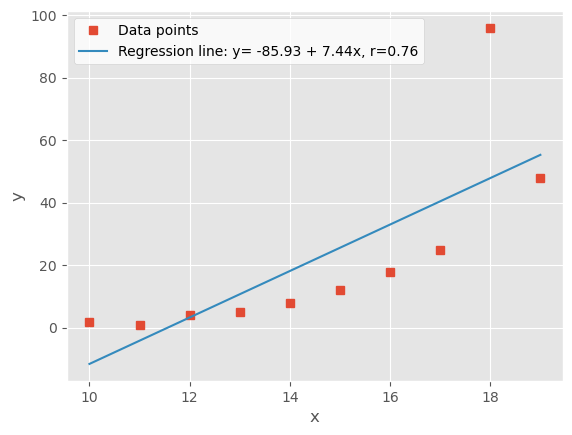

In [21]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()


## Heatmaps of Correlation Matrices


In [22]:
corr_matrix = np.corrcoef(xyz).round(decimals=2)
corr_matrix


array([[ 1.  ,  0.76, -0.97],
       [ 0.76,  1.  , -0.83],
       [-0.97, -0.83,  1.  ]])

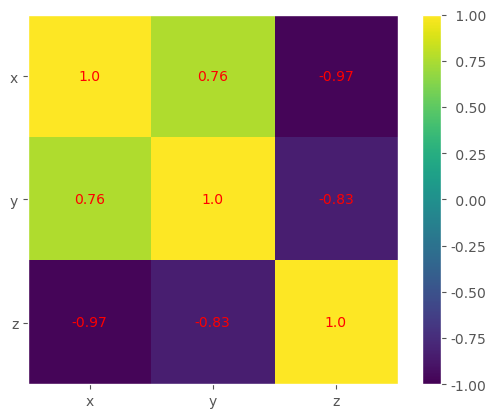

In [23]:
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()
